__Morning Joe__: Visualizing Coffee Futures by Laura Kahn 

__Problem__: *Is there a relationship between rainfall, temperature, coffee leaf rust, production and futures?*

__Data Acquisition__: 

*Data Sources

-  Rust data from Varginha, Brasil (September 2005-August 2006): Meira figure 2
-  Rust Data from Adamantina, Brasil (September 1-11, 2008 and September 1-September 11,2009): Paulo figure 1
-  Rust Data from La Catalina, Naranjal, Supia, Colombia (January-December 1995): Ruiz Cardenas figures 1 and 7
-  Rust Data from Naranjal, Colombia (August 2011-December 2013): Corrales supplemental data file
-  Rust Data from Yate, Canala New Caledonia (March 1989-November 1991): Lamouroux
-  Production data:  http://www.ico.org/new_historical.asp?section=Statistics
-  Futures data for all countries from http://data.tradingcharts.com/futures/quotes/kc.html

*Data Assumptions

- Curated dataset has 335 observations of four input variables: average rain (mm), average temperature (degrees C), rust (percent disease that covers the plant leaf), production (1000-60 kg bags of beans) and one target variable: futures (in USD)

*Missing Data Methods

- The 81 additional observations from Brasil in 2008 and 2009 were calculated using the ranking-kNN method as described in Beretta L, Santaniello A. "Nearest neighbor imputation algorithms: a critical evaluation". BMC Med Inform Decis Mak. 2016 Jul 25;16 Suppl 3:74. https://doi.org/10.1186/s12911-016-0318-z.
- Additional code documentation at: https://github.com/LBcoding/ranking-kNN-imputation

In [105]:
#CMD - pip install pytz, pip install pandas, pip install matplotlib, pip install numpy
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [106]:
#Read the CSV into a data frame without country names

#This dataset contains 120 missing values from Colombia and Brasil
df = pd.read_csv('Coffee-Rust-Nov17.csv')
df.head()

,Date,Rainfall,Temperature,Rust,Production,Futures
0,3/15/1989,352.42,25.28,6.33,97.92,23.18
1,3/31/1989,352.42,25.28,6.33,97.92,23.89
2,4/14/1989,309.50,25.35,15.67,97.92,26.27
3,4/28/1989,309.50,25.35,15.67,97.92,25.60
4,5/15/1989,252.75,25.32,23.33,97.92,22.85


### Now let's fill in the missing values using the kNN ranking data imputation method

In [5]:
'''
An imputation method based on ranking and nearest neighbor.
    
Beretta L, Santaniello A. Nearest neighbor imputation algorithms: a critical
evaluation. BMC Med Inform Decis Mak. 2016 Jul 25;16 Suppl 3:74.
'''
#Author: Lorenzo Beretta, lorberimm@hotmail.com

#Adapted by L Kahn; 11/20/18

#Dependencies Installation
#pip install rkNN-imputer, pip install sk-rebate

'\nAn imputation method based on ranking and nearest neighbor.\n    \nBeretta L, Santaniello A. Nearest neighbor imputation algorithms: a critical\nevaluation. BMC Med Inform Decis Mak. 2016 Jul 25;16 Suppl 3:74.\n'

In [107]:
#Delete date column
final =  df.drop(df.columns[0], axis=1)

#Convert pandas dataframe as numpy array
array = final.values

from rkNN_imputer.rkNN import rkNN

imp = rkNN ()
imp.fit (array)
imputed_array = imp.transform (array)

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


In [27]:
#Let's look at just the array
imputed_array

array([[ 352.42,   25.28,    6.33,   97.92,   23.18],
       [ 352.42,   25.28,    6.33,   97.92,   23.89],
       [ 309.5 ,   25.35,   15.67,   97.92,   26.27],
       ...,
       [ 124.1 ,   25.69,    8.78, 1111.08,  165.84],
       [ 124.1 ,   25.69,    8.78, 1111.08,  174.07],
       [ 124.1 ,   25.69,    8.78, 1111.08,  175.18]])

In [108]:
#Convert imputed values back to pandas dataframe

#Code adapted from https://www.ritchieng.com/creating-dataframe-from-objects/
# columns
columns_new = ['Rainfall', 'Temperature','Rust','Production','Futures']

# pass in array and columns
new = pd.DataFrame(imputed_array, columns=columns_new)
new.head()

,Rainfall,Temperature,Rust,Production,Futures
0,352.42,25.28,6.33,97.92,23.18
1,352.42,25.28,6.33,97.92,23.89
2,309.50,25.35,15.67,97.92,26.27
3,309.50,25.35,15.67,97.92,25.60
4,252.75,25.32,23.33,97.92,22.85


In [110]:
#Save imputed dataframe "new" to CSV
new.to_csv("new2.csv")

In [111]:
#Add date column back in to the "new" imputed dataframe.
df2 = pd.read_csv('new2.csv')
df2.head()

,Unnamed: 0,Rainfall,Temperature,Rust,Production,Futures
0,0,352.42,25.28,6.33,97.92,23.18
1,1,352.42,25.28,6.33,97.92,23.89
2,2,309.50,25.35,15.67,97.92,26.27
3,3,309.50,25.35,15.67,97.92,25.60
4,4,252.75,25.32,23.33,97.92,22.85


## Exploratory data analysis
### Let's start by looking at the summary statistics for each variable in the data.

In [112]:
df2.describe()

,Unnamed: 0,Rainfall,Temperature,Rust,Production,Futures
count,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000
mean,161.000000,189.918111,25.153560,13.762908,1649.058916,91.100217
std,93.386294,92.658214,0.815875,11.107253,1240.730643,45.488614
min,0.000000,1.800000,23.470000,0.000000,80.330000,21.980000
25%,80.500000,117.400000,24.560000,5.000000,1010.330000,39.035000
50%,161.000000,190.160000,25.050000,12.410000,1073.170000,103.830000
75%,241.500000,257.360000,25.780000,20.000000,2783.330000,129.580000
max,322.000000,407.700000,27.160000,50.000000,3832.670000,175.180000


-  Rainfall ranges from 1.8 - 407.7 mm with a mean of 189.92.
-  Temperature ranges from 23.47-27.16 C with a mean of 25.15.
-  Rust ranges from 0 - 50% with a mean of 13.763.
-  Production ranges from 80.33-3832.67 1000-60kg bags of beans with a mean of 1649.06.
-  Futures ranges from 21.98-175.18 USD with a mean of 91.1.

Text(0.5,1,'Exploring Coffee Rust, Production and Futures')

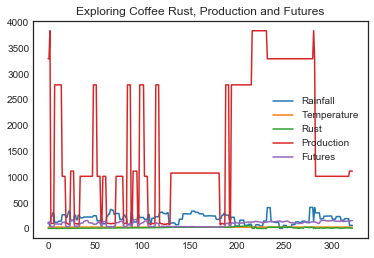

In [80]:
#Let's look at a plot of all columns with labels
import numpy as np
import matplotlib.pyplot as plt
df2.plot();
plt.title("Exploring Coffee Rust, Production and Futures")

This first basic plot is not very helpful in understanding if there are relationships between variables.

Text(0.5,1,'Log - Coffee Rust, Production and Futures')

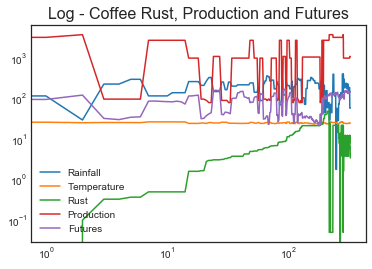

In [81]:
#Since the regular scale plot isn't very helpful, let's look at the variable interaction on a log scale.
df2.plot();
plt.yscale('log')
plt.xscale('log')
plt.title("Log - Coffee Rust, Production and Futures", fontsize=16)

### This is still not the best visualization to see what's happening between the variables.

#### Let's do a plot of Futures over time.

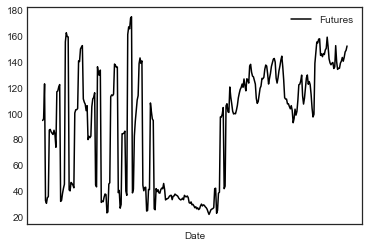

In [79]:
df2.plot(x='Date',y='Futures',color='black')

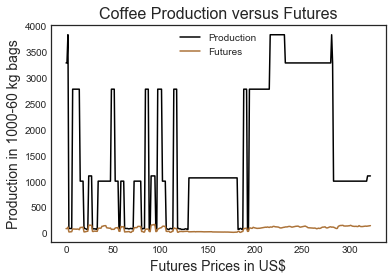

In [92]:
#Now, let's look at the relationship between Production and Futures.

df2['Production'].plot(color='black')
df2['Futures'].plot(color="#ac7339")

plt.xlabel("Futures Prices in US$",fontsize=14)
plt.ylabel("Production in 1000-60 kg bags",fontsize=14)
plt.title("Coffee Production versus Futures",fontsize=16)
plt.legend()

- From this plot, we see that there is a much greater range in the 'Production' variable than the 'Futures' variable.
- Production values vary in a much bigger range than the futures values.
-  From this visualization, it's hard to see any possible relationship between Production and Futures.

#### Next, let's look to see if there's a relationship between Rust and Production.

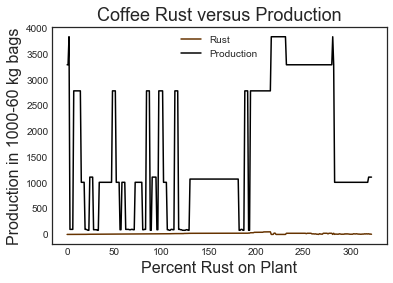

In [41]:
df2['Rust'].plot(color='#663300')
df2['Production'].plot(color='black')
plt.xlabel("Percent Rust on Plant",fontsize=16)
plt.ylabel("Production in 1000-60 kg bags",fontsize=16)
plt.title("Coffee Rust versus Production",fontsize=18)
plt.legend()

#### From this plot, it's hard to tell if there's a correlation between rust and production variables.

-  Finally,  let's take a look at the relationship between Rust and Futures to see if we can find any insights from the visualization. The x-axis maximum value is 50 to reflect maximum rust %.

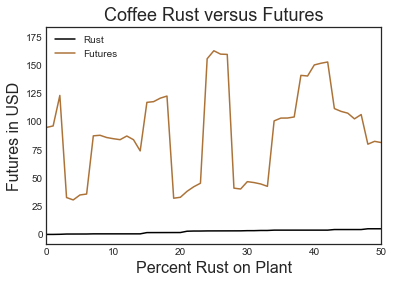

In [42]:
df2['Rust'].plot(color='black')
df2['Futures'].plot(color='#ac7339')
plt.xlim(0,50)
plt.xlabel("Percent Rust on Plant", fontsize=16)
plt.ylabel("Futures in USD", fontsize=16)
plt.title("Coffee Rust versus Futures", fontsize=18)
plt.legend()

-  It's still hard to tell if there are any definitive relationships from this visualization.

#### Let's look at a histogram of Futures to see if this helps answer our relationship questions.

C:\Users\lkahn\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Coffee Futures Histogram')

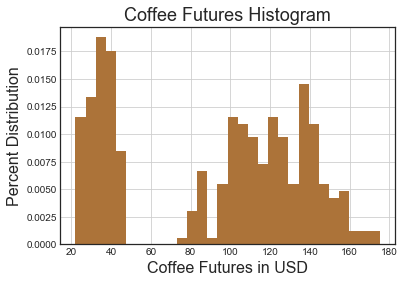

In [44]:
df2['Futures'].hist(bins=30, normed=True, color='#ac7339')
plt.xlabel("Coffee Futures in USD",fontsize=16)
plt.ylabel("Percent Distribution",fontsize=16)
plt.title("Coffee Futures Histogram",fontsize=18)

-  A bin size of 30 in the histogram seems to show the variations and groupings of the data the best.
-  Coffee futures range from 20-180 USD. 
-  The data is bimodal with two peaks around 35 and 120 USD.
-  The distribution of the data doesn't have a large skewedness.

C:\Users\lkahn\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Coffee Rust Histogram')

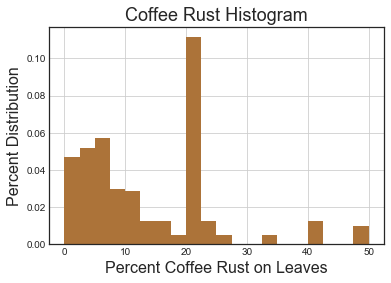

In [46]:
df2['Rust'].hist(bins=20, normed=True, color='#ac7339')
plt.xlabel("Percent Coffee Rust on Leaves",fontsize=16)
plt.ylabel("Percent Distribution",fontsize=16)
plt.title("Coffee Rust Histogram",fontsize=18)

-  After experimentation, a bin size of 20 was chosen to show variances in data.
-  The dataset is skewed left.
-  The majority of the Rust occurrs between 0-10%

#### Let's plot a histogram of Production

C:\Users\lkahn\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Coffee Production Histogram')

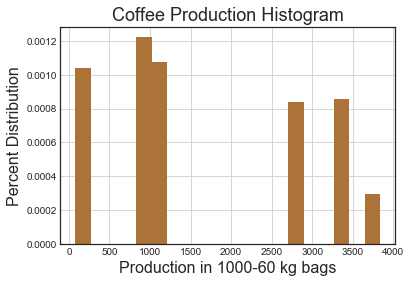

In [50]:
df2['Production'].hist(bins=20, normed=True, color='#ac7339')
plt.xlabel("Production in 1000-60 kg bags", fontsize=16)
plt.ylabel("Percent Distribution",fontsize=16)
plt.title("Coffee Production Histogram",fontsize=18)

-  After experimentation, a bin size of 20 was chosen to best show any possible patterns.
-  This visualization just confirms we have discrete production amounts ranging from 0-4000 1000-60 kg bags.

#### Since none of the visualizations have been able to answer our initial problem if there is a relationship between the variables, let's try a heatmap visualization.


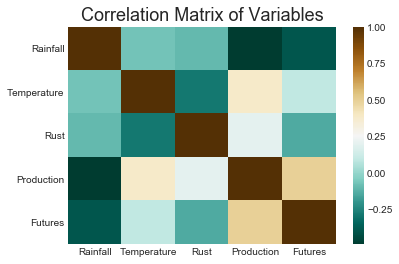

In [53]:
import seaborn as sns
ax = plt.axes()
corr = df2.corr()
#The default colors were changed to 'BrBG_r' to match better with the 
#browns in the other visualizations.
sns.heatmap(corr, cmap='BrBG_r',xticklabels=corr.columns.values, yticklabels=corr.columns.values)
#Label title
ax.set_title('Correlation Matrix of Variables',fontsize=18)
plt.show()

__Heat Map Conclusions__:

-  Rain, temperature, production, rust and futures are quantitatively related to each other.
-  Rain and temperature are not correlated to each other (correlation = 0).
-  Temperature is negatively correlated to rust (-0.25) so if temperature increases, rust decreases.
-  Rain is negatively correlated (about -0.5) to production so if rain increases, production decreases.
-  Rain is not correlated to rust (correlation =0).
-  Production is positively correlated (0.3) to futures so if production increases, futures increase.
-  Rust is positively correlated to production (0.25) so if rust increases, production increases.
-  Rust is negatively correlated to futures (-0.1) so if rust decreases, futures increase.

#### Let's see if we can see these relationships in another way using linear regression.

*Rust and Production

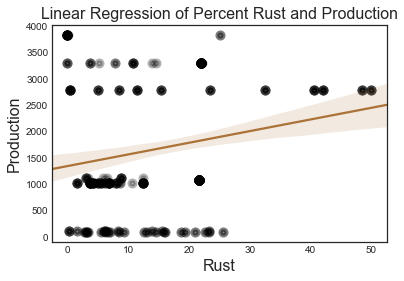

In [55]:
ax = plt.axes()
ax.set_title('Linear Regression of Percent Rust and Production',fontsize=16)
ax.set_xlabel('Percent Rust on Plant',fontsize=16)
ax.set_ylabel('Production in 1000-60kg bags',fontsize=16)
sns.regplot(x=df2['Rust'],color='#ac7339', y=df2['Production'],scatter_kws={"color":"black","alpha":0.3,"lw":4} )
plt.show()

*Production and Futures

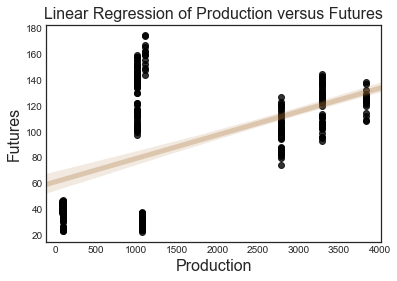

In [56]:
ax = plt.axes()
ax.set_title('Linear Regression of Production versus Futures',fontsize=16)
ax.set_xlabel('Production in 1000-60kg bags',fontsize=16)
ax.set_ylabel('Futures in USD', fontsize=16)
sns.regplot(x=df2['Production'], color='black', y=df2['Futures'],line_kws={"color":"#ac7339","alpha":0.3,"lw":5} )
plt.show()

*Rust and Futures

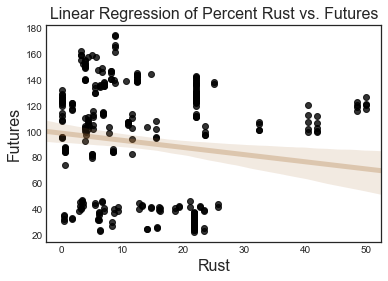

In [57]:
ax = plt.axes()
ax.set_title('Linear Regression of Percent Rust vs. Futures',fontsize=16)
ax.set_xlabel('Percent Rust on Plant', fontsize=16)
ax.set_ylabel('Futures in USD', fontsize=16)
sns.regplot(x=df2['Rust'], color='black', y=df2['Futures'],line_kws={"color":"#ac7339","alpha":0.3,"lw":5} )
plt.show()

#### Next, we'll use try to quantify these relationships in another way.

- Let's use a pivot table to group the data by Rust percent.

In [58]:
pivot_df = df2.pivot_table(index=['Rust'])
pivot_df

,Futures,Production,Rainfall,Temperature
Rust,,,,
0.000000,95.740000,3289.170000,117.400000,26.330000
0.050000,121.582667,3832.670000,80.273333,26.131333
0.100000,123.160000,3832.670000,29.900000,25.590000
0.330000,31.620000,97.920000,230.770000,25.890000
0.370000,35.365000,97.920000,302.420000,25.700000
0.500000,84.378750,2783.330000,129.385000,26.795000
1.610000,120.118000,1010.330000,272.870000,24.626000
1.670000,32.495000,97.920000,213.670000,25.140000
2.830000,38.200000,91.000000,274.940000,24.570000


In [62]:
#Save df to CSV
pivot_df.to_csv('pivot.csv')

#### Let's quantify slope and root-mean-squared error (NRMSE) of each variable.

In [71]:
coefficients, residuals, _, _, _ = np.polyfit(range(len(pivot_df.index)),pivot_df,1,full=True)
mse = residuals[0]/(len(pivot_df.index))
nrmse = np.sqrt(mse)/(pivot_df.max() - pivot_df.min())

#Print results
print('Slope ' + str(coefficients[0]))
print('NRMSE: ' + str(nrmse))

Slope [-7.08883840e-02  1.00213844e+01 -3.80311683e-01 -5.79495147e-03]
NRMSE: Futures         0.309562
Production      0.011982
Rainfall        0.138975
Temperature    12.184565
dtype: float64


- Futures slope = -0.071 and NRMSE = 0.309
- Productions slope = 10.02 and NRMSE = 0.012
- Rainfall slope = -0.3803 and NRMSE = 0.139
- Temperature slope = -0.006 and NRMSE = 12.184

In [66]:
#Now let's manipulate the dataframe to only look at 'Rust' and 'Futures' variables.
rust_futures = pivot_df.iloc[:, 0:1]
rust_futures.head()

,Futures
Rust,
0.00,95.740000
0.05,121.582667
0.10,123.160000
0.33,31.620000
0.37,35.365000


#### Use least squares polynomial fit for Rust & Futures variables.

In [69]:
import numpy as np
coefficients, residuals, _, _, _ = np.polyfit(range(len(rust_futures.index)),rust_futures,1,full=True)
mse = residuals[0]/(len(rust_futures.index))
nrmse = np.sqrt(mse)/(rust_futures.max() - rust_futures.min())

#Print results
print('Slope ' + str(coefficients[0]))
print('NRMSE: ' + str(nrmse))

Slope [-0.07088838]
NRMSE: Futures    0.309562
dtype: float64


- From the heatmap, we estimated Rust and Futures are negatively correlated to each other by -0.1. 
- The least squares polynomial fit shows us Rust and Futures are negatively correlated to each other by -0.071.

- Also, the Root -mean-square error between the estimated and observed futures values is 0.309562.
